In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [7]:
# Read dataset
df_red = pd.read_csv('data/winequality-red.csv', sep=';')
df_red.insert(0, 'type', 'red')

df_white = pd.read_csv('data/winequality-white.csv', sep=';')
df_white.insert(0, 'type', 'white')

df = pd.concat([df_red, df_white], axis=0)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### EDA

In [10]:
# Check for missing values
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

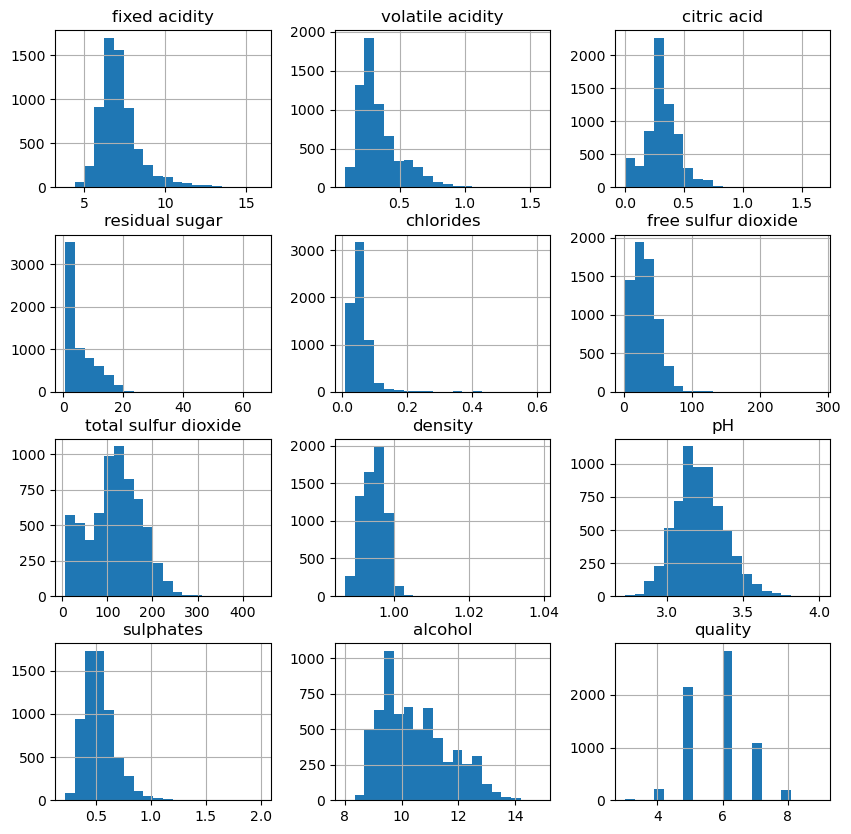

In [11]:
# Plot histogram
df.hist(bins=20, figsize=(10,10))
plt.show()

In [14]:
df.replace({'white': 1, 'red': 0}, inplace=True)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,0,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


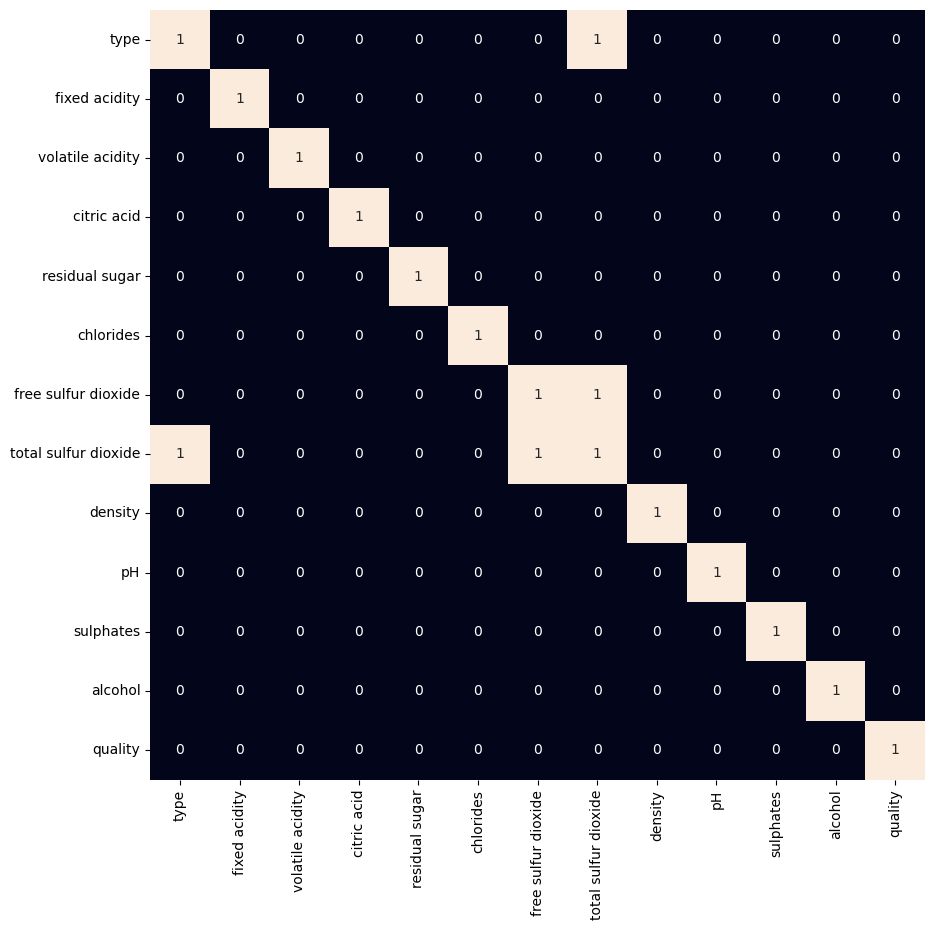

In [15]:
# Create heatmap to check correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr() > 0.7, annot=True, cbar=False)
plt.show()

In [16]:
df = df.drop(['total sulfur dioxide'], axis=1)

### Model development

In [17]:
df['best quality'] = np.where(df['quality'] > 5, 1, 0)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,5,0
1,0,7.8,0.88,0.00,2.6,0.098,25.0,0.9968,3.20,0.68,9.8,5,0
2,0,7.8,0.76,0.04,2.3,0.092,15.0,0.9970,3.26,0.65,9.8,5,0
3,0,11.2,0.28,0.56,1.9,0.075,17.0,0.9980,3.16,0.58,9.8,6,1
4,0,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,5,0


In [18]:
# Split data
features = df.drop(['quality', 'best quality'], axis=1)
target = df['best quality']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((5197, 11), (1300, 11))

In [19]:
# Normalise data
norm = MinMaxScaler()
X_train = norm.fit_transform(X_train)
X_test = norm.transform(X_test)

In [27]:
# Train models
models = [LogisticRegression(), SVC(kernel='rbf'), XGBClassifier()]
y_pred_models = []

for i in range(len(models)):
    models[i].fit(X_train, y_train)
    y_pred = models[i].predict(X_test)
    y_pred_models.append(y_pred)

    print(f'Model: {models[i]}')
    print(f'Training Accuracy: {metrics.roc_auc_score(y_train, models[i].predict(X_train))}')
    print(f'Testing Accuracy: {metrics.roc_auc_score(y_test, models[i].predict(X_test))}')
    print()

Model: LogisticRegression()
Training Accuracy: 0.7041667934633761
Testing Accuracy: 0.695197689207859

Model: SVC()
Training Accuracy: 0.7217105446679447
Testing Accuracy: 0.7130392087730708

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Training Accuracy: 0.9802210605530366
Testi

### Model evaluation

              precision    recall  f1-score   support

           0       0.62      0.58      0.60       451
           1       0.78      0.81      0.80       849

    accuracy                           0.73      1300
   macro avg       0.70      0.70      0.70      1300
weighted avg       0.73      0.73      0.73      1300



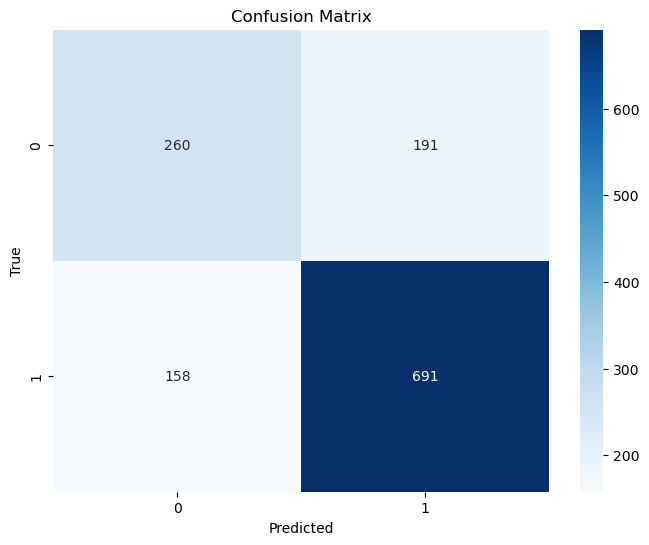

In [30]:
# Logistic regression
print(classification_report(y_test, y_pred_models[0]))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_models[0])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0       0.66      0.59      0.62       451
           1       0.79      0.84      0.81       849

    accuracy                           0.75      1300
   macro avg       0.73      0.71      0.72      1300
weighted avg       0.75      0.75      0.75      1300



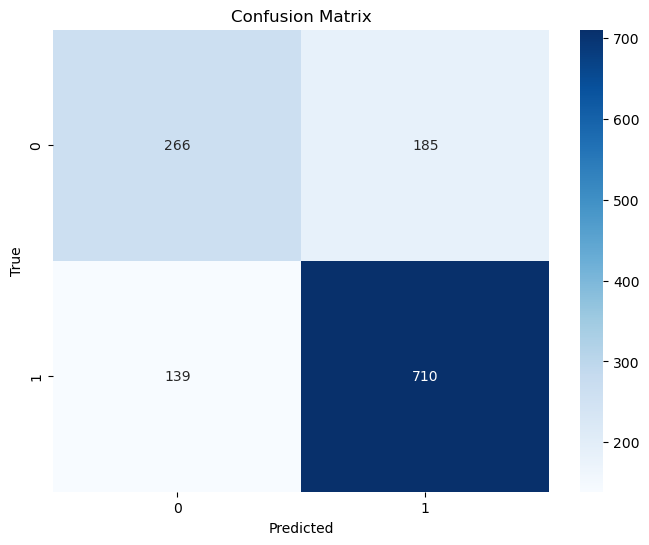

In [31]:
# SVC
print(classification_report(y_test, y_pred_models[1]))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_models[1])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0       0.72      0.71      0.71       451
           1       0.84      0.85      0.85       849

    accuracy                           0.80      1300
   macro avg       0.78      0.78      0.78      1300
weighted avg       0.80      0.80      0.80      1300



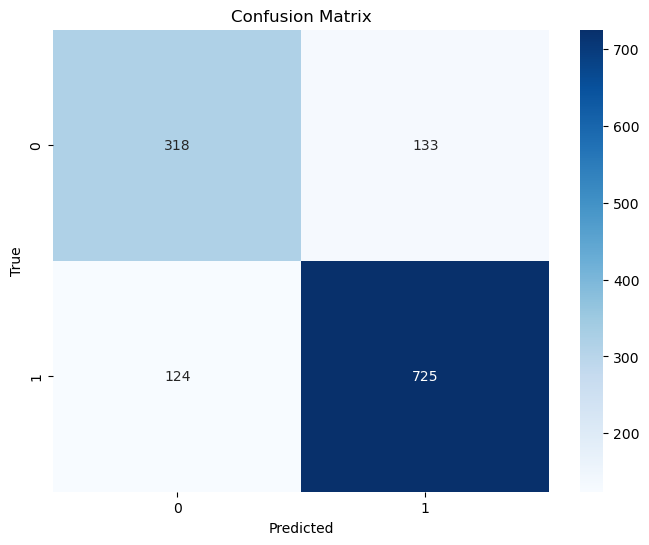

In [32]:
# XGBClassifier
print(classification_report(y_test, y_pred_models[2]))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_models[2])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Reference

https://www.geeksforgeeks.org/wine-quality-prediction-machine-learning/?ref=lbp